<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
keras = tf.keras

In [149]:
tf.random.set_seed(42)
np.random.seed(42)
# bkeras.backend.clear_session()

In [150]:
train=pd.read_csv('./train.csv')
train

,Territory X Date,target,cases,Territory,Date
0,Afghanistan X 1/22/20,0,0,Afghanistan,1/22/20
1,Afghanistan X 1/23/20,0,0,Afghanistan,1/23/20
2,Afghanistan X 1/24/20,0,0,Afghanistan,1/24/20
3,Afghanistan X 1/25/20,0,0,Afghanistan,1/25/20
4,Afghanistan X 1/26/20,0,0,Afghanistan,1/26/20
...,...,...,...,...,...
16297,Zimbabwe X 4/4/20,1,9,Zimbabwe,4/4/20
16298,Zimbabwe X 4/5/20,1,9,Zimbabwe,4/5/20
16299,Zimbabwe X 4/6/20,1,10,Zimbabwe,4/6/20
16300,Zimbabwe X 4/7/20,2,11,Zimbabwe,4/7/20


In [151]:
#let make the curbe stationnary by derivations. 
for country in train.Territory.unique():
    train.loc[train.Territory==country,"target"]=train.loc[train.Territory==country,"target"].diff(-1)
train.dropna(inplace=True)
train.head()

,Territory X Date,target,cases,Territory,Date
0,Afghanistan X 1/22/20,0.0,0,Afghanistan,1/22/20
1,Afghanistan X 1/23/20,0.0,0,Afghanistan,1/23/20
2,Afghanistan X 1/24/20,0.0,0,Afghanistan,1/24/20
3,Afghanistan X 1/25/20,0.0,0,Afghanistan,1/25/20
4,Afghanistan X 1/26/20,0.0,0,Afghanistan,1/26/20


The train file will change every day due to 

In [152]:
train.head()

,Territory X Date,target,cases,Territory,Date
0,Afghanistan X 1/22/20,0.0,0,Afghanistan,1/22/20
1,Afghanistan X 1/23/20,0.0,0,Afghanistan,1/23/20
2,Afghanistan X 1/24/20,0.0,0,Afghanistan,1/24/20
3,Afghanistan X 1/25/20,0.0,0,Afghanistan,1/25/20
4,Afghanistan X 1/26/20,0.0,0,Afghanistan,1/26/20


In [153]:
train.tail()

,Territory X Date,target,cases,Territory,Date
16296,Zimbabwe X 4/3/20,0.0,9,Zimbabwe,4/3/20
16297,Zimbabwe X 4/4/20,0.0,9,Zimbabwe,4/4/20
16298,Zimbabwe X 4/5/20,0.0,9,Zimbabwe,4/5/20
16299,Zimbabwe X 4/6/20,-1.0,10,Zimbabwe,4/6/20
16300,Zimbabwe X 4/7/20,-1.0,11,Zimbabwe,4/7/20


In [154]:
train.Territory.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas (the)', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic (the)', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros (the)', 'Congo (the)', 'Costa Rica',
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', "Côte d'Ivoire",
       "Democratic People's Republic of Korea (the)",
       'Democratic Republic of the Congo (the)', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic (the)', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
 

Let's Visualize a the curve of some countries

In [155]:
[train.Territory=='Afghanistan','cases']

[0         True
 1         True
 2         True
 3         True
 4         True
          ...  
 16296    False
 16297    False
 16298    False
 16299    False
 16300    False
 Name: Territory, Length: 16093, dtype: bool, 'cases']

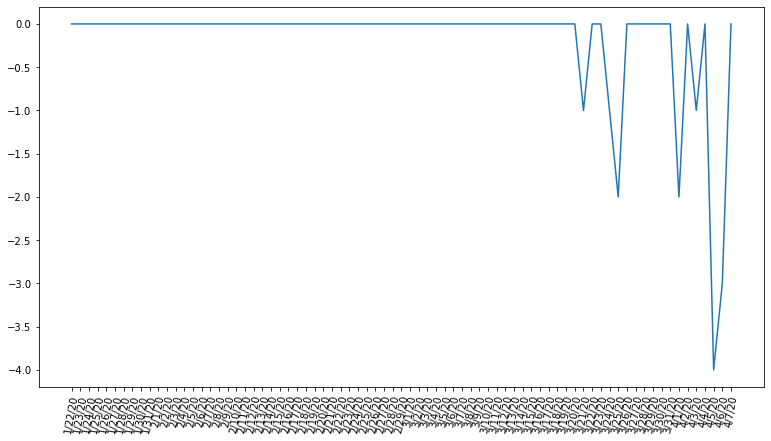

In [156]:
def visualize_countries(country):
    plt.figure(figsize=(13,7))
#     plt.plot(train.loc[train.Territory==country,'Date'],train.loc[train.Territory==country,'cases'])
    plt.plot(train.loc[train.Territory==country,'Date'],train.loc[train.Territory==country,'target'])
    
    plt.xticks(rotation=80)
    plt.show()
    
visualize_countries("Afghanistan")

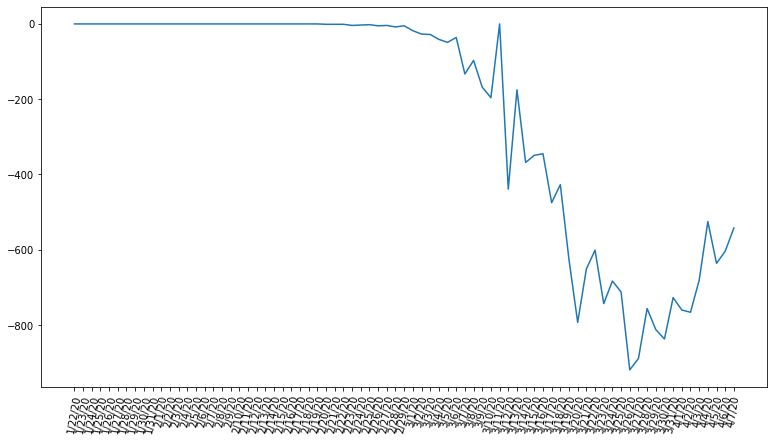

In [157]:
visualize_countries('Italy')

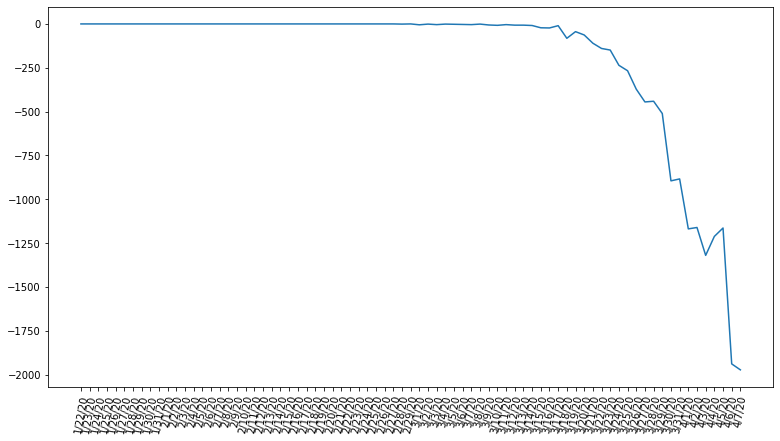

In [158]:
visualize_countries("United States of America (the)")

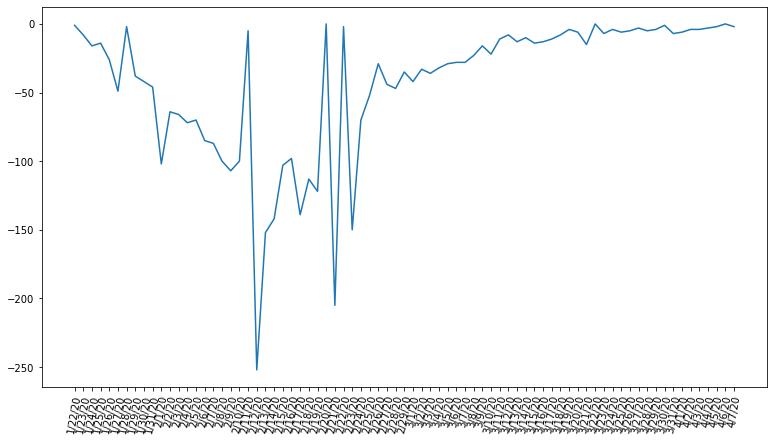

In [159]:
visualize_countries('China')

In [160]:
global_country=train.groupby("Territory").sum().reset_index()
global_country.max()

Territory    Zimbabwe
target              0
cases         4764627
dtype: object

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,   1.,   2.,  10.,
        183.]),
 array([-17669.  , -17492.31, -17315.62, -17138.93, -16962.24, -16785.55,
        -16608.86, -16432.17, -16255.48, -16078.79, -15902.1 , -15725.41,
        -15548.72, -15372.03, -15195.34, -15018.65, -14841.96, -14665.27,
        -14488.58, -14311.89, -14135.2 , -13958.51, -13781.82, -13605.13,
        -13428.44, -13

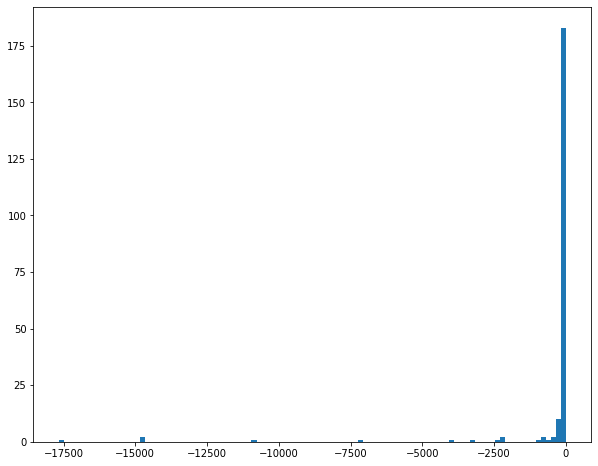

In [161]:
# global_country['target'].hist()
plt.figure(figsize=(10,8))
plt.hist(global_country["target"],bins=100)

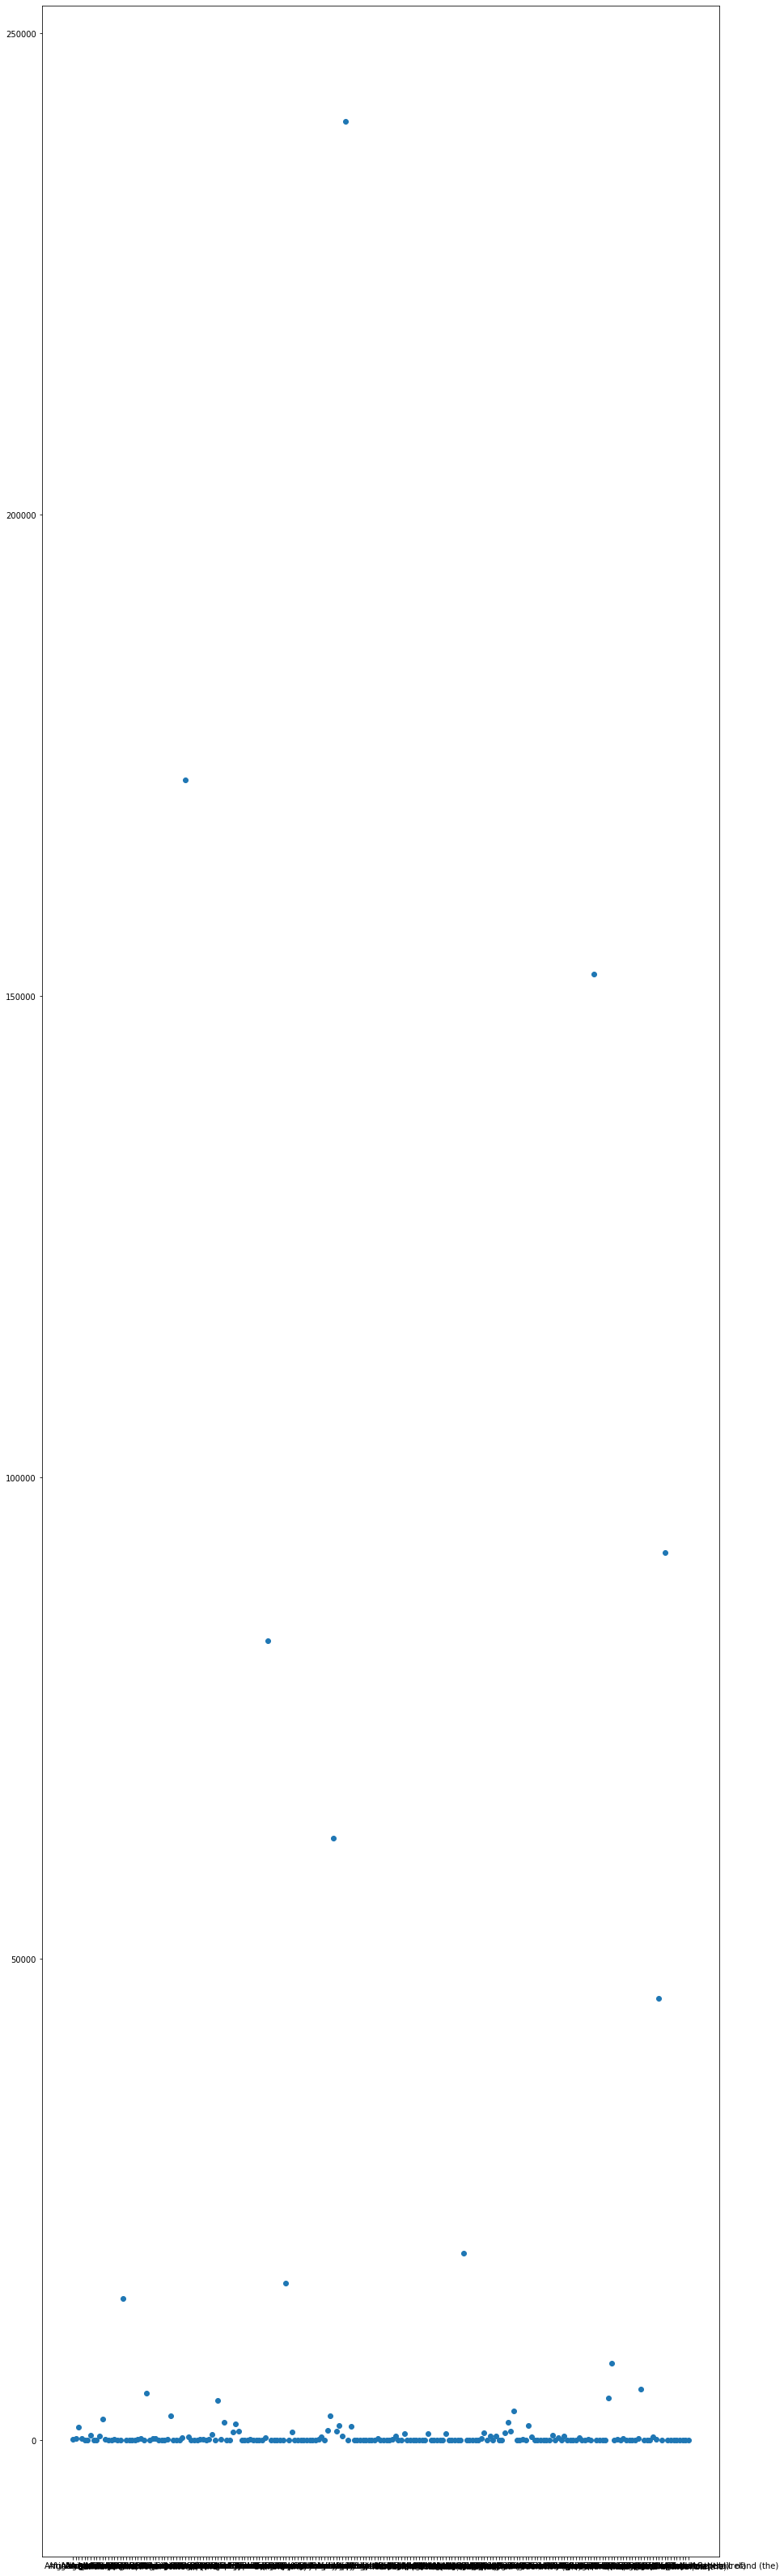

In [80]:
plt.figure(figsize=(15,58))
plt.scatter(global_country.Territory,global_country.target)

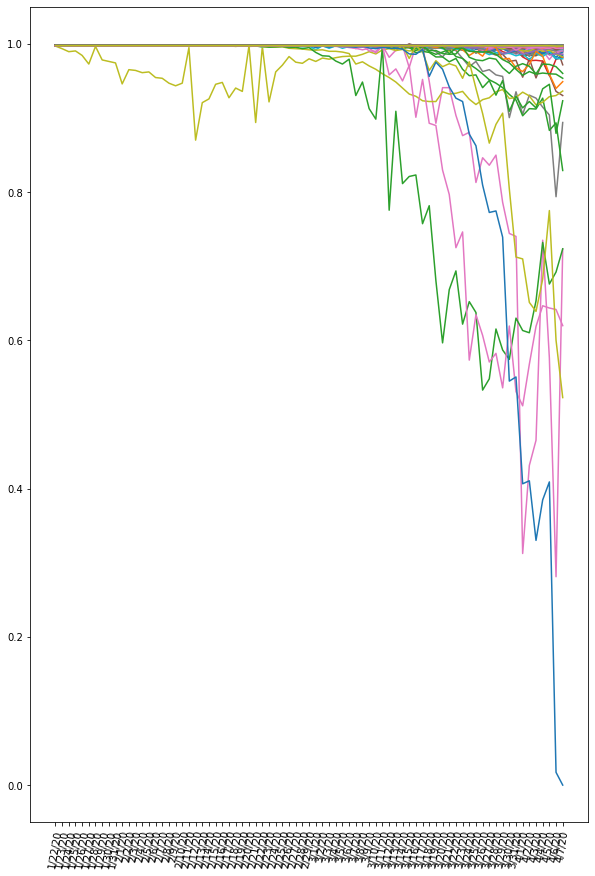

In [167]:
plt.figure(figsize=(10,15))
for k in train.Territory.unique():
    plt.plot(train.loc[train.Territory==k,'Date'],train.loc[train.Territory==k,'target'])

plt.xticks(rotation=80)
plt.show()

In [57]:
global_country['target'].describe()

count       209.000000
mean       4645.478469
std       24894.504367
min           0.000000
25%           0.000000
50%          29.000000
75%         284.000000
max      240848.000000
Name: target, dtype: float64

In [58]:
global_country['target'].median()

29.0

In [59]:
train.loc[train.Territory=='China'].shape

(78, 5)

In [163]:
def window_dataset(series, window_size, batch_size=32,
                   shuffle_buffer=10):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))
#     dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

def preprocessing(country):
    train_country=train.loc[train.Territory==country,'target'].values
    scaler=MinMaxScaler(feature_range=(0.,1))
    train_country=scaler.fit_transform(train_country.reshape(-1,1)).reshape(1,-1)[0]
       
    #splitting training data 2/3 for the training part and 1/3 of the part 
    split_data=int(2*train_country.shape[0]/3)
    series_train=train_country[:split_data]
    series_validation=train_country[split_data:]
    print('the length for the specific dataset ',len(train_country))    
    print('the length of training set is ',series_train.shape,'and the lenght of the validation set is ',series_validation.shape)
    return [ series_train,series_validation,scaler]

def define_model(k=100):
    
    model = keras.models.Sequential([
      keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                          input_shape=[None]),
      keras.layers.LSTM(k, return_sequences=True,
                         input_shape=[None, 1]),
      keras.layers.LSTM(k, ),
#       keras.layers.Dense(100),
    #       keras.layers.SimpleRNN(1),
    #       keras.layers.SimpleRNN(100, return_sequences=True),
    #       keras.layers.SimpleRNN(100),
            keras.layers.Dense(1),
#           keras.layers.Lambda(lambda x: x * 500.0)
        ])
    return model

def sequential_window_dataset(series, window_size,forward_step=7):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(  window_size + forward_step, shift=window_size, drop_remainder=True)
    ds = ds.flat_map(lambda window: window.batch(window_size + forward_step))
    ds = ds.map(lambda window: (window[:-forward_step], window[window_size:]))
    return ds

class ResetStatesCallback(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs):
        self.model.reset_states()

def preprocessing_all_data(window_size,shuffle_buffer,batch_size=100):
    split=int(2*(train.loc[train.Territory=='China','target'].shape[0])/3)
    series=train.loc[train.Territory=='China','target'].values
    toscale=train.target.values
    scaler=MinMaxScaler(feature_range=(0,1))
    
    scaler.fit(toscale.reshape(-1,1))
    series=scaler.transform(series.reshape(-1,1)).reshape(1,-1)[0]
    
    dataset_train=window_dataset(series[:split],window_size)
    dataset_validation=window_dataset(series[split:],window_size)
    
    for country in train.Territory.unique():
        series=train.loc[train.Territory==country,'target'].values
        series=scaler.transform(series.reshape(-1,1)).reshape(1,-1)[0]
        #create a datset for one country
        dataset_train_country=window_dataset(series[:split],window_size)
        dataset_validation_country=window_dataset(series[split:],window_size)
        #concatenate in the stack
        dataset_train=dataset_train.concatenate(dataset_train_country)
        data_validation=dataset_validation.concatenate(dataset_validation_country)
        
    dataset_train=dataset_train.batch(batch_size).prefetch(1)
    dataset_validation=dataset_validation.batch(batch_size).prefetch(1)
    return [dataset_train,dataset_validation,scaler]

        
        

    

In [164]:
#differents type of model
def define_model_Rnn():
    model = keras.models.Sequential([
      keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                          input_shape=[None]),
        
          keras.layers.SimpleRNN(100, return_sequences=True),
          keras.layers.SimpleRNN(100),
            keras.layers.Dense(1),
#           keras.layers.Lambda(lambda x: x * 500.0)
        ])
    return model


    

In [165]:
window_size=20
dataset_train,dataset_validation,scaler_all_data=preprocessing_all_data(window_size,10)
# train_copy=train.copy()
# train.target=scaler_all_data.transform(train.target.values.reshape(-1,1)).reshape(1,-1)[0]


In [166]:
train.target.max(),train.target.min()

(1.0, 0.0)

In [20]:
# ds=dataset_train.take(4)
# for k in ds:
#     c,d=k
#     print(c.shape,d.shape)
#     break
# ds=dataset_validation.take(4)
# for k in ds:
#     c,d=k
#     print(c.shape,d.shape)
#     break

In [21]:
# # for specific country let's say china
# # series_train,series_validation,scaler_china=preprocessing('China')


# # making window dataset




# for X_batch, y_batch in sequential_window_dataset(tf.range(100), 10):
#     print(X_batch.numpy(), y_batch.numpy(),end='/')

In [307]:
# ds=dataset_validation.take(4)
# for k in ds:
#     c,d=k
#     print(c.shape,d.shape)
#     break
# # dataset_validation

In [140]:
# window_size = 5
# train_set = window_dataset(series_train, window_size ,batch_size=10)

# valid_set = window_dataset(series_validation, window_size ,batch_size=10)
def decreasing(epochs):
    lr=1e-5
    if epochs <10:
        lr
    else:
        lr=lr*(1**(-epochs/10))
    return lr
result={}
# for k in [20,50,100]:
#     model = define_model(k)

#     # optimizer = keras.optimizers.SGD(lr=1.5e-6, momentum=0.9)
#     optimizer=keras.optimizers.Nadam(learning_rate=1e-5)
#     model.compile(loss=keras.losses.Huber(),
#                   optimizer=optimizer,
#                   metrics=["mae"])


#     early_stopping = keras.callbacks.EarlyStopping(patience=50)
#     lr_schedule_decreasing = keras.callbacks.LearningRateScheduler(decreasing)
#     model_checkpoint = keras.callbacks.ModelCheckpoint(
#         "my_checkpoint", save_best_only=True)



#     result[k]=model.fit(dataset_train, epochs=50,
#               validation_data=dataset_validation,
#               callbacks=[early_stopping, model_checkpoint,lr_schedule_decreasing])


In [567]:
# result={"10": result[0],"50":result[1],"100": result[2]}
result

{'10': <tensorflow.python.keras.callbacks.History at 0x7fe78a6a2710>,
 '50': <tensorflow.python.keras.callbacks.History at 0x7fe6f7ae17f0>,
 '100': <tensorflow.python.keras.callbacks.History at 0x7fe764a397b8>}

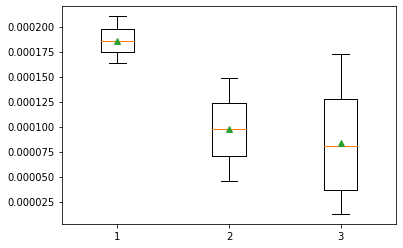

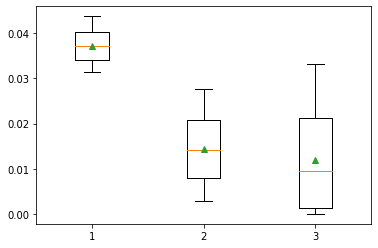

In [580]:
def plot_history(result,key):

    plt.boxplot([result[k].history[key] for k in result.keys()],showmeans=True)
#     ax.set_title=f'History of {key}'
    plt.show()
    
#         plt.xticks=[10,50,100]
#     plt.plot(history.history['loss'],label=label)

plot_history(result,'loss')
plot_history(result,'val_loss')


    
#     result[0].history.loss

the model with 100 consecutive cellule is better

In [168]:
# Optimise learning rate
# window_size = 5
# train_set = window_dataset(series_train, window_size)

model=define_model(100)
lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 30))
reset_states = ResetStatesCallback()
# optimizer = keras.optimizers.SGD(lr=1e-8, momentum=0.9)
optimizer=keras.optimizers.Nadam(learning_rate=1e-8)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(dataset_train, epochs=200,
                    callbacks=[lr_schedule])

Epoch 1/200
66/66 [==============================] - 7s 108ms/step - loss: 0.4044 - mae: 0.8993
Epoch 2/200
66/66 [==============================] - 5s 78ms/step - loss: 0.4043 - mae: 0.8992
Epoch 3/200
66/66 [==============================] - 5s 83ms/step - loss: 0.4041 - mae: 0.8990
Epoch 4/200
66/66 [==============================] - 6s 93ms/step - loss: 0.4040 - mae: 0.8989
Epoch 5/200
66/66 [==============================] - 7s 100ms/step - loss: 0.4039 - mae: 0.8987
Epoch 6/200
66/66 [==============================] - 7s 102ms/step - loss: 0.4037 - mae: 0.8985
Epoch 7/200
66/66 [==============================] - 8s 122ms/step - loss: 0.4035 - mae: 0.8983
Epoch 8/200
66/66 [==============================] - 7s 110ms/step - loss: 0.4034 - mae: 0.8981
Epoch 9/200
66/66 [==============================] - 8s 118ms/step - loss: 0.4032 - mae: 0.8979
Epoch 10/200
66/66 [==============================] - 7s 105ms/step - loss: 0.4030 - mae: 0.8977
Epoch 11/200
66/66 [======================

66/66 [==============================] - 6s 97ms/step - loss: 9.8605e-06 - mae: 5.5556e-04
Epoch 86/200
66/66 [==============================] - 7s 102ms/step - loss: 9.8564e-06 - mae: 5.0319e-04
Epoch 87/200
66/66 [==============================] - 7s 106ms/step - loss: 9.8567e-06 - mae: 4.9454e-04
Epoch 88/200
66/66 [==============================] - 7s 103ms/step - loss: 9.8571e-06 - mae: 4.9359e-04
Epoch 89/200
66/66 [==============================] - 7s 103ms/step - loss: 9.8586e-06 - mae: 4.9520e-04
Epoch 90/200
66/66 [==============================] - 7s 104ms/step - loss: 9.8596e-06 - mae: 4.9874e-04
Epoch 91/200
66/66 [==============================] - 7s 106ms/step - loss: 9.8609e-06 - mae: 5.0335e-04
Epoch 92/200
66/66 [==============================] - 7s 114ms/step - loss: 9.8624e-06 - mae: 5.0884e-04
Epoch 93/200
66/66 [==============================] - 7s 103ms/step - loss: 9.8634e-06 - mae: 5.1490e-04
Epoch 94/200
66/66 [==============================] - 7s 106ms/step -

66/66 [==============================] - 6s 92ms/step - loss: 1.8444e-05 - mae: 0.0029
Epoch 164/200
66/66 [==============================] - 6s 95ms/step - loss: 9.8513e-05 - mae: 0.0090
Epoch 165/200
66/66 [==============================] - 6s 94ms/step - loss: 3.2970e-04 - mae: 0.0155
Epoch 166/200
66/66 [==============================] - 6s 92ms/step - loss: 2.6127e-05 - mae: 0.0044
Epoch 167/200
66/66 [==============================] - 6s 93ms/step - loss: 2.2144e-04 - mae: 0.0132
Epoch 168/200
66/66 [==============================] - 6s 93ms/step - loss: 5.8966e-05 - mae: 0.0081
Epoch 169/200
66/66 [==============================] - 6s 90ms/step - loss: 3.0672e-04 - mae: 0.0148
Epoch 170/200
66/66 [==============================] - 6s 89ms/step - loss: 3.0415e-05 - mae: 0.0045
Epoch 171/200
66/66 [==============================] - 6s 90ms/step - loss: 1.5529e-04 - mae: 0.0116
Epoch 172/200
66/66 [==============================] - 6s 89ms/step - loss: 1.1195e-04 - mae: 0.0101
Epoc

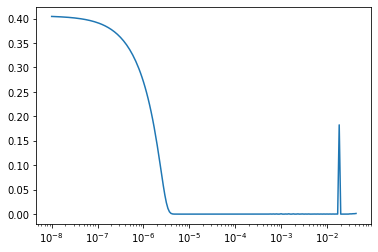

In [169]:
plt.semilogx(history.history["lr"], history.history["loss"])

In [170]:
model = define_model(100)

# optimizer = keras.optimizers.SGD(lr=1.5e-6, momentum=0.9)
optimizer=keras.optimizers.Nadam(learning_rate=1e-6)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])


early_stopping = keras.callbacks.EarlyStopping(patience=50)
lr_schedule_decreasing = keras.callbacks.LearningRateScheduler(decreasing)
model_checkpoint = keras.callbacks.ModelCheckpoint(
    "my_checkpoint", save_best_only=True)
model.fit(dataset_train, epochs=500,
          validation_data=dataset_validation,
          callbacks=[early_stopping, model_checkpoint,lr_schedule_decreasing])


Epoch 1/500
     66/Unknown - 7s 112ms/step - loss: 0.4374 - mae: 0.9355INFO:tensorflow:Assets written to: my_checkpoint/assets
66/66 [==============================] - 13s 198ms/step - loss: 0.4374 - mae: 0.9355 - val_loss: 0.3792 - val_mae: 0.8709
Epoch 2/500
66/66 [==============================] - 12s 177ms/step - loss: 0.3236 - mae: 0.8044 - val_loss: 0.2651 - val_mae: 0.7282
Epoch 3/500
66/66 [==============================] - 11s 172ms/step - loss: 0.2080 - mae: 0.6441 - val_loss: 0.1493 - val_mae: 0.5465
Epoch 4/500
66/66 [==============================] - 12s 180ms/step - loss: 0.0977 - mae: 0.4387 - val_loss: 0.0511 - val_mae: 0.3197
Epoch 5/500
66/66 [==============================] - 12s 187ms/step - loss: 0.0238 - mae: 0.2105 - val_loss: 0.0062 - val_mae: 0.1110
Epoch 6/500
66/66 [==============================] - 12s 186ms/step - loss: 0.0018 - mae: 0.0548 - val_loss: 1.8743e-04 - val_mae: 0.0194
Epoch 7/500
66/66 [==============================] - 12s 187ms/step - loss: 

Epoch 30/500
66/66 [==============================] - 14s 206ms/step - loss: 1.0478e-05 - mae: 5.8720e-04 - val_loss: 1.3542e-06 - val_mae: 0.0016
Epoch 31/500
66/66 [==============================] - 14s 215ms/step - loss: 1.0478e-05 - mae: 5.8989e-04 - val_loss: 1.3476e-06 - val_mae: 0.0016
Epoch 32/500
66/66 [==============================] - 13s 195ms/step - loss: 1.0478e-05 - mae: 5.9232e-04 - val_loss: 1.3410e-06 - val_mae: 0.0016
Epoch 33/500
66/66 [==============================] - 14s 208ms/step - loss: 1.0478e-05 - mae: 5.9452e-04 - val_loss: 1.3347e-06 - val_mae: 0.0016
Epoch 34/500
66/66 [==============================] - 13s 203ms/step - loss: 1.0481e-05 - mae: 5.9664e-04 - val_loss: 1.3290e-06 - val_mae: 0.0016
Epoch 35/500
66/66 [==============================] - 14s 216ms/step - loss: 1.0480e-05 - mae: 5.9861e-04 - val_loss: 1.3232e-06 - val_mae: 0.0016
Epoch 36/500
66/66 [==============================] - 13s 201ms/step - loss: 1.0478e-05 - mae: 6.0007e-04 - val_loss: 

66/66 [==============================] - 7s 109ms/step - loss: 1.0496e-05 - mae: 6.5183e-04 - val_loss: 1.3809e-06 - val_mae: 0.0016
Epoch 72/500
66/66 [==============================] - 8s 115ms/step - loss: 1.0495e-05 - mae: 6.5284e-04 - val_loss: 1.3785e-06 - val_mae: 0.0016
Epoch 73/500
66/66 [==============================] - 7s 109ms/step - loss: 1.0495e-05 - mae: 6.5484e-04 - val_loss: 1.3752e-06 - val_mae: 0.0016
Epoch 74/500
66/66 [==============================] - 7s 111ms/step - loss: 1.0493e-05 - mae: 6.5645e-04 - val_loss: 1.3719e-06 - val_mae: 0.0016
Epoch 75/500
66/66 [==============================] - 7s 110ms/step - loss: 1.0487e-05 - mae: 6.5809e-04 - val_loss: 1.3685e-06 - val_mae: 0.0016
Epoch 76/500
66/66 [==============================] - 7s 111ms/step - loss: 1.0497e-05 - mae: 6.5951e-04 - val_loss: 1.3642e-06 - val_mae: 0.0016
Epoch 77/500
66/66 [==============================] - 8s 115ms/step - loss: 1.0496e-05 - mae: 6.6068e-04 - val_loss: 1.3593e-06 - val_mae

66/66 [==============================] - 13s 198ms/step - loss: 1.0534e-05 - mae: 6.8171e-04 - val_loss: 1.2738e-06 - val_mae: 0.0015
Epoch 110/500
66/66 [==============================] - 15s 223ms/step - loss: 1.0534e-05 - mae: 6.8217e-04 - val_loss: 1.2729e-06 - val_mae: 0.0015
Epoch 111/500
66/66 [==============================] - 14s 214ms/step - loss: 1.0534e-05 - mae: 6.8276e-04 - val_loss: 1.2725e-06 - val_mae: 0.0015
Epoch 112/500
66/66 [==============================] - 15s 230ms/step - loss: 1.0537e-05 - mae: 6.8349e-04 - val_loss: 1.2721e-06 - val_mae: 0.0015
Epoch 113/500
66/66 [==============================] - 14s 209ms/step - loss: 1.0515e-05 - mae: 6.8232e-04 - val_loss: 1.2717e-06 - val_mae: 0.0015
Epoch 114/500
66/66 [==============================] - 15s 232ms/step - loss: 1.0544e-05 - mae: 6.8435e-04 - val_loss: 1.2716e-06 - val_mae: 0.0015
Epoch 115/500
66/66 [==============================] - 14s 215ms/step - loss: 1.0552e-05 - mae: 6.8488e-04 - val_loss: 1.2705e

Epoch 138/500
66/66 [==============================] - 13s 202ms/step - loss: 1.0590e-05 - mae: 6.9386e-04 - val_loss: 1.2343e-06 - val_mae: 0.0015
Epoch 139/500
66/66 [==============================] - 15s 221ms/step - loss: 1.0611e-05 - mae: 6.9400e-04 - val_loss: 1.2316e-06 - val_mae: 0.0015
Epoch 140/500
66/66 [==============================] - 14s 210ms/step - loss: 1.0630e-05 - mae: 6.9452e-04 - val_loss: 1.2298e-06 - val_mae: 0.0015
Epoch 141/500
66/66 [==============================] - 15s 222ms/step - loss: 1.0635e-05 - mae: 6.9432e-04 - val_loss: 1.2278e-06 - val_mae: 0.0015
Epoch 142/500
66/66 [==============================] - 13s 203ms/step - loss: 1.0620e-05 - mae: 6.9406e-04 - val_loss: 1.2261e-06 - val_mae: 0.0015
Epoch 143/500
66/66 [==============================] - 14s 215ms/step - loss: 1.0636e-05 - mae: 6.9530e-04 - val_loss: 1.2246e-06 - val_mae: 0.0015
Epoch 144/500
66/66 [==============================] - 14s 209ms/step - loss: 1.0623e-05 - mae: 6.9539e-04 - val

66/66 [==============================] - 11s 170ms/step - loss: 1.0692e-05 - mae: 7.0599e-04 - val_loss: 1.1988e-06 - val_mae: 0.0015
Epoch 167/500
66/66 [==============================] - 12s 181ms/step - loss: 1.0697e-05 - mae: 7.0610e-04 - val_loss: 1.1975e-06 - val_mae: 0.0015
Epoch 168/500
66/66 [==============================] - 10s 158ms/step - loss: 1.0756e-05 - mae: 7.1083e-04 - val_loss: 1.1967e-06 - val_mae: 0.0015
Epoch 169/500
66/66 [==============================] - 12s 183ms/step - loss: 1.0753e-05 - mae: 7.1106e-04 - val_loss: 1.1954e-06 - val_mae: 0.0015
Epoch 170/500
66/66 [==============================] - 11s 171ms/step - loss: 1.0675e-05 - mae: 7.0747e-04 - val_loss: 1.1944e-06 - val_mae: 0.0015
Epoch 171/500
66/66 [==============================] - 11s 163ms/step - loss: 1.0710e-05 - mae: 7.0859e-04 - val_loss: 1.1939e-06 - val_mae: 0.0015
Epoch 172/500
66/66 [==============================] - 14s 207ms/step - loss: 1.0712e-05 - mae: 7.0952e-04 - val_loss: 1.1929e

66/66 [==============================] - 12s 187ms/step - loss: 1.0691e-05 - mae: 7.1558e-04 - val_loss: 1.1677e-06 - val_mae: 0.0015
Epoch 196/500
66/66 [==============================] - 14s 213ms/step - loss: 1.0610e-05 - mae: 7.0979e-04 - val_loss: 1.1673e-06 - val_mae: 0.0015
Epoch 197/500
66/66 [==============================] - 14s 213ms/step - loss: 1.0714e-05 - mae: 7.1775e-04 - val_loss: 1.1660e-06 - val_mae: 0.0015
Epoch 198/500
66/66 [==============================] - 18s 267ms/step - loss: 1.0671e-05 - mae: 7.1467e-04 - val_loss: 1.1649e-06 - val_mae: 0.0015
Epoch 199/500
66/66 [==============================] - 19s 287ms/step - loss: 1.0711e-05 - mae: 7.1816e-04 - val_loss: 1.1628e-06 - val_mae: 0.0014
Epoch 200/500
66/66 [==============================] - 16s 248ms/step - loss: 1.0662e-05 - mae: 7.1640e-04 - val_loss: 1.1621e-06 - val_mae: 0.0014
Epoch 201/500
66/66 [==============================] - 19s 283ms/step - loss: 1.0678e-05 - mae: 7.1703e-04 - val_loss: 1.1606e

Epoch 224/500
66/66 [==============================] - 15s 220ms/step - loss: 1.0592e-05 - mae: 7.2244e-04 - val_loss: 1.1339e-06 - val_mae: 0.0014
Epoch 225/500
66/66 [==============================] - 15s 221ms/step - loss: 1.0554e-05 - mae: 7.1986e-04 - val_loss: 1.1327e-06 - val_mae: 0.0014
Epoch 226/500
66/66 [==============================] - 14s 214ms/step - loss: 1.0663e-05 - mae: 7.2741e-04 - val_loss: 1.1314e-06 - val_mae: 0.0014
Epoch 227/500
66/66 [==============================] - 15s 234ms/step - loss: 1.0592e-05 - mae: 7.2312e-04 - val_loss: 1.1304e-06 - val_mae: 0.0014
Epoch 228/500
66/66 [==============================] - 13s 197ms/step - loss: 1.0616e-05 - mae: 7.2390e-04 - val_loss: 1.1293e-06 - val_mae: 0.0014
Epoch 229/500
66/66 [==============================] - 15s 227ms/step - loss: 1.0617e-05 - mae: 7.2557e-04 - val_loss: 1.1278e-06 - val_mae: 0.0014
Epoch 230/500
66/66 [==============================] - 14s 216ms/step - loss: 1.0667e-05 - mae: 7.2856e-04 - val

66/66 [==============================] - 14s 217ms/step - loss: 1.0591e-05 - mae: 7.3081e-04 - val_loss: 1.1019e-06 - val_mae: 0.0014
Epoch 253/500
66/66 [==============================] - 15s 227ms/step - loss: 1.0548e-05 - mae: 7.2972e-04 - val_loss: 1.1005e-06 - val_mae: 0.0014
Epoch 254/500
66/66 [==============================] - 14s 208ms/step - loss: 1.0564e-05 - mae: 7.2985e-04 - val_loss: 1.0999e-06 - val_mae: 0.0014
Epoch 255/500
66/66 [==============================] - 14s 209ms/step - loss: 1.0577e-05 - mae: 7.3247e-04 - val_loss: 1.0987e-06 - val_mae: 0.0014
Epoch 256/500
66/66 [==============================] - 14s 217ms/step - loss: 1.0528e-05 - mae: 7.2902e-04 - val_loss: 1.0975e-06 - val_mae: 0.0014
Epoch 257/500
66/66 [==============================] - 14s 215ms/step - loss: 1.0553e-05 - mae: 7.3023e-04 - val_loss: 1.0968e-06 - val_mae: 0.0014
Epoch 258/500
66/66 [==============================] - 14s 216ms/step - loss: 1.0555e-05 - mae: 7.3035e-04 - val_loss: 1.0961e

Epoch 281/500
66/66 [==============================] - 13s 202ms/step - loss: 1.0476e-05 - mae: 7.3217e-04 - val_loss: 1.0716e-06 - val_mae: 0.0014
Epoch 282/500
66/66 [==============================] - 13s 198ms/step - loss: 1.0497e-05 - mae: 7.3415e-04 - val_loss: 1.0703e-06 - val_mae: 0.0014
Epoch 283/500
66/66 [==============================] - 14s 219ms/step - loss: 1.0504e-05 - mae: 7.3371e-04 - val_loss: 1.0693e-06 - val_mae: 0.0014
Epoch 284/500
66/66 [==============================] - 13s 203ms/step - loss: 1.0505e-05 - mae: 7.3537e-04 - val_loss: 1.0676e-06 - val_mae: 0.0014
Epoch 285/500
66/66 [==============================] - 14s 219ms/step - loss: 1.0511e-05 - mae: 7.3617e-04 - val_loss: 1.0670e-06 - val_mae: 0.0014
Epoch 286/500
66/66 [==============================] - 13s 192ms/step - loss: 1.0485e-05 - mae: 7.3434e-04 - val_loss: 1.0659e-06 - val_mae: 0.0014
Epoch 287/500
66/66 [==============================] - 13s 204ms/step - loss: 1.0485e-05 - mae: 7.3482e-04 - val

66/66 [==============================] - 15s 225ms/step - loss: 1.0488e-05 - mae: 7.3739e-04 - val_loss: 1.0446e-06 - val_mae: 0.0014
Epoch 310/500
66/66 [==============================] - 13s 197ms/step - loss: 1.0429e-05 - mae: 7.3479e-04 - val_loss: 1.0428e-06 - val_mae: 0.0014
Epoch 311/500
66/66 [==============================] - 14s 210ms/step - loss: 1.0454e-05 - mae: 7.3690e-04 - val_loss: 1.0421e-06 - val_mae: 0.0014
Epoch 312/500
66/66 [==============================] - 13s 197ms/step - loss: 1.0429e-05 - mae: 7.3592e-04 - val_loss: 1.0413e-06 - val_mae: 0.0014
Epoch 313/500
66/66 [==============================] - 14s 216ms/step - loss: 1.0476e-05 - mae: 7.3834e-04 - val_loss: 1.0402e-06 - val_mae: 0.0014
Epoch 314/500
66/66 [==============================] - 12s 183ms/step - loss: 1.0424e-05 - mae: 7.3490e-04 - val_loss: 1.0394e-06 - val_mae: 0.0014
Epoch 315/500
66/66 [==============================] - 14s 219ms/step - loss: 1.0443e-05 - mae: 7.3649e-04 - val_loss: 1.0381e

66/66 [==============================] - 16s 237ms/step - loss: 1.0418e-05 - mae: 7.3682e-04 - val_loss: 1.0185e-06 - val_mae: 0.0013
Epoch 339/500
66/66 [==============================] - 13s 203ms/step - loss: 1.0425e-05 - mae: 7.3734e-04 - val_loss: 1.0172e-06 - val_mae: 0.0013
Epoch 340/500
66/66 [==============================] - 14s 210ms/step - loss: 1.0420e-05 - mae: 7.3805e-04 - val_loss: 1.0165e-06 - val_mae: 0.0013
Epoch 341/500
66/66 [==============================] - 14s 211ms/step - loss: 1.0371e-05 - mae: 7.3425e-04 - val_loss: 1.0155e-06 - val_mae: 0.0013
Epoch 342/500
66/66 [==============================] - 17s 252ms/step - loss: 1.0392e-05 - mae: 7.3741e-04 - val_loss: 1.0143e-06 - val_mae: 0.0013
Epoch 343/500
66/66 [==============================] - 15s 228ms/step - loss: 1.0383e-05 - mae: 7.3644e-04 - val_loss: 1.0136e-06 - val_mae: 0.0013
Epoch 344/500
66/66 [==============================] - 15s 229ms/step - loss: 1.0382e-05 - mae: 7.3669e-04 - val_loss: 1.0128e

Epoch 368/500
66/66 [==============================] - 14s 212ms/step - loss: 1.0307e-05 - mae: 7.3326e-04 - val_loss: 9.9354e-07 - val_mae: 0.0013
Epoch 369/500
66/66 [==============================] - 13s 191ms/step - loss: 1.0339e-05 - mae: 7.3555e-04 - val_loss: 9.9177e-07 - val_mae: 0.0013
Epoch 370/500
66/66 [==============================] - 16s 238ms/step - loss: 1.0341e-05 - mae: 7.3487e-04 - val_loss: 9.9171e-07 - val_mae: 0.0013
Epoch 371/500
66/66 [==============================] - 13s 196ms/step - loss: 1.0343e-05 - mae: 7.3563e-04 - val_loss: 9.9087e-07 - val_mae: 0.0013
Epoch 372/500
66/66 [==============================] - 15s 220ms/step - loss: 1.0338e-05 - mae: 7.3568e-04 - val_loss: 9.8960e-07 - val_mae: 0.0013
Epoch 373/500
66/66 [==============================] - 13s 201ms/step - loss: 1.0269e-05 - mae: 7.3101e-04 - val_loss: 9.8905e-07 - val_mae: 0.0013
Epoch 374/500
66/66 [==============================] - 14s 205ms/step - loss: 1.0357e-05 - mae: 7.3726e-04 - val

66/66 [==============================] - 13s 204ms/step - loss: 1.0307e-05 - mae: 7.3562e-04 - val_loss: 9.6849e-07 - val_mae: 0.0013
Epoch 399/500
66/66 [==============================] - 6s 86ms/step - loss: 1.0316e-05 - mae: 7.3522e-04 - val_loss: 9.6879e-07 - val_mae: 0.0013
Epoch 400/500
66/66 [==============================] - 13s 202ms/step - loss: 1.0304e-05 - mae: 7.3514e-04 - val_loss: 9.6740e-07 - val_mae: 0.0013
Epoch 401/500
66/66 [==============================] - 14s 214ms/step - loss: 1.0283e-05 - mae: 7.3410e-04 - val_loss: 9.6667e-07 - val_mae: 0.0013
Epoch 402/500
66/66 [==============================] - 14s 208ms/step - loss: 1.0268e-05 - mae: 7.3304e-04 - val_loss: 9.6592e-07 - val_mae: 0.0013
Epoch 403/500
66/66 [==============================] - 14s 218ms/step - loss: 1.0245e-05 - mae: 7.3202e-04 - val_loss: 9.6464e-07 - val_mae: 0.0013
Epoch 404/500
66/66 [==============================] - 13s 203ms/step - loss: 1.0307e-05 - mae: 7.3529e-04 - val_loss: 9.6416e-0

66/66 [==============================] - 8s 116ms/step - loss: 1.0271e-05 - mae: 7.3276e-04 - val_loss: 9.4763e-07 - val_mae: 0.0013
Epoch 430/500
66/66 [==============================] - 17s 263ms/step - loss: 1.0239e-05 - mae: 7.3131e-04 - val_loss: 9.4603e-07 - val_mae: 0.0013
Epoch 431/500
66/66 [==============================] - 6s 92ms/step - loss: 1.0224e-05 - mae: 7.3023e-04 - val_loss: 9.4657e-07 - val_mae: 0.0013
Epoch 432/500
66/66 [==============================] - 14s 219ms/step - loss: 1.0242e-05 - mae: 7.3177e-04 - val_loss: 9.4558e-07 - val_mae: 0.0013
Epoch 433/500
66/66 [==============================] - 14s 217ms/step - loss: 1.0256e-05 - mae: 7.3268e-04 - val_loss: 9.4510e-07 - val_mae: 0.0013
Epoch 434/500
66/66 [==============================] - 12s 188ms/step - loss: 1.0217e-05 - mae: 7.2991e-04 - val_loss: 9.4443e-07 - val_mae: 0.0013
Epoch 435/500
66/66 [==============================] - 14s 215ms/step - loss: 1.0232e-05 - mae: 7.3124e-04 - val_loss: 9.4346e-07

66/66 [==============================] - 14s 214ms/step - loss: 1.0171e-05 - mae: 7.2811e-04 - val_loss: 9.2511e-07 - val_mae: 0.0013
Epoch 461/500
66/66 [==============================] - 12s 187ms/step - loss: 1.0177e-05 - mae: 7.2949e-04 - val_loss: 9.2457e-07 - val_mae: 0.0013
Epoch 462/500
66/66 [==============================] - 13s 200ms/step - loss: 1.0183e-05 - mae: 7.2834e-04 - val_loss: 9.2433e-07 - val_mae: 0.0013
Epoch 463/500
66/66 [==============================] - 14s 211ms/step - loss: 1.0175e-05 - mae: 7.2892e-04 - val_loss: 9.2304e-07 - val_mae: 0.0013
Epoch 464/500
66/66 [==============================] - 12s 184ms/step - loss: 1.0186e-05 - mae: 7.2887e-04 - val_loss: 9.2267e-07 - val_mae: 0.0013
Epoch 465/500
66/66 [==============================] - 14s 210ms/step - loss: 1.0179e-05 - mae: 7.2845e-04 - val_loss: 9.2187e-07 - val_mae: 0.0013
Epoch 466/500
66/66 [==============================] - 13s 198ms/step - loss: 1.0169e-05 - mae: 7.2805e-04 - val_loss: 9.2102e

Epoch 492/500
66/66 [==============================] - 16s 238ms/step - loss: 1.0152e-05 - mae: 7.2696e-04 - val_loss: 9.0483e-07 - val_mae: 0.0013
Epoch 493/500
66/66 [==============================] - 13s 197ms/step - loss: 1.0115e-05 - mae: 7.2408e-04 - val_loss: 9.0458e-07 - val_mae: 0.0013
Epoch 494/500
66/66 [==============================] - 14s 207ms/step - loss: 1.0155e-05 - mae: 7.2682e-04 - val_loss: 9.0354e-07 - val_mae: 0.0012
Epoch 495/500
66/66 [==============================] - 13s 202ms/step - loss: 1.0062e-05 - mae: 7.2145e-04 - val_loss: 9.0245e-07 - val_mae: 0.0012
Epoch 496/500
66/66 [==============================] - 13s 193ms/step - loss: 1.0125e-05 - mae: 7.2567e-04 - val_loss: 9.0088e-07 - val_mae: 0.0012
Epoch 497/500
66/66 [==============================] - 5s 79ms/step - loss: 1.0166e-05 - mae: 7.2749e-04 - val_loss: 9.0095e-07 - val_mae: 0.0012
Epoch 498/500
66/66 [==============================] - 6s 89ms/step - loss: 1.0135e-05 - mae: 7.2550e-04 - val_los

In [171]:
model = keras.models.load_model("my_checkpoint")

In [172]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast


In [27]:
# dd=tf.data.Dataset.from_tensor_slices(series_validation)
# dd=dd.window(window_size, shift=1, drop_remainder=True)
# for j in dd:
#     for k in j:
#         print(k.numpy(),end=' ')
#     print('/')

In [28]:
# validation=dataset_validation.take(5)
# for k in validation:
#     print(k)

In [330]:
forecast_train=model_forecast(model,series_train,window_size)
forecast=model_forecast(model,series_validation,window_size)
forecast=forecast.reshape(1,-1)[0]
forecast_train=forecast_train.reshape(1,-1)[0]
forecast=scaler_china.inverse_transform(forecast.reshape(-1,1)).reshape(1,-1)[0]
series_validation_rescale=scaler_china.inverse_transform(series_validation.reshape(-1,1)).reshape(1,-1)[0]


len(forecast),series_validation.shape,forecast_train.shape


(20, (24,), (43,))

In [331]:
series_validation

array([0.94149742, 0.94634738, 0.95301607, 0.95635041, 0.95877539,
       0.96271597, 0.9657472 , 0.96999091, 0.97393149, 0.97726584,
       0.97969082, 0.9809033 , 0.98272204, 0.98726887, 0.98726887,
       0.98939072, 0.99060321, 0.99242195, 0.99393756, 0.99484692,
       0.99636253, 0.99757502, 0.99787814, 1.        ])

In [173]:
# plot result
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)
    


(100,) (100, 15)


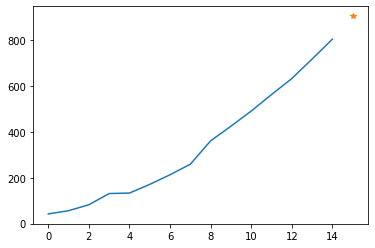

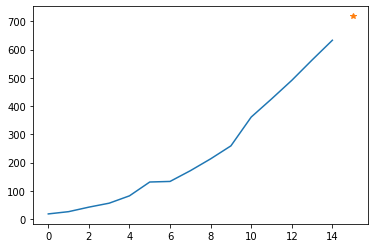

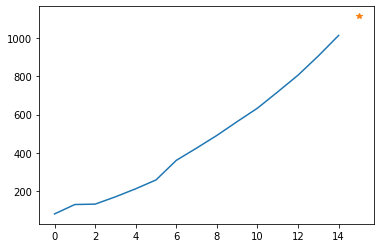

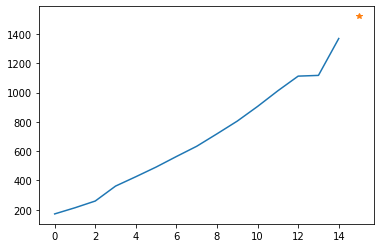

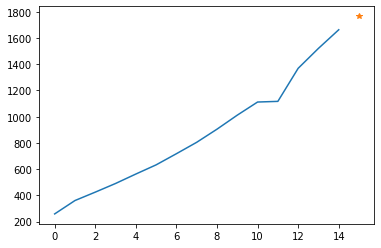

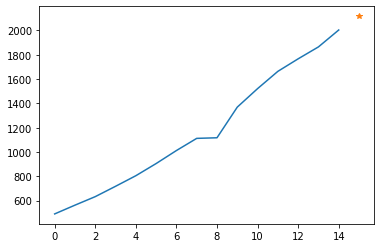

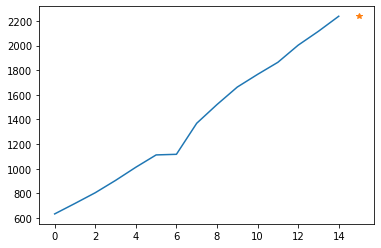

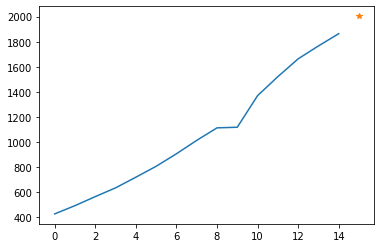

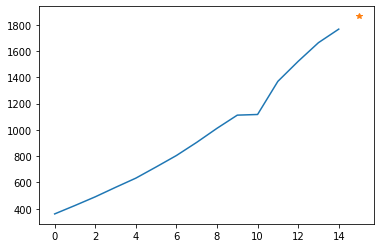

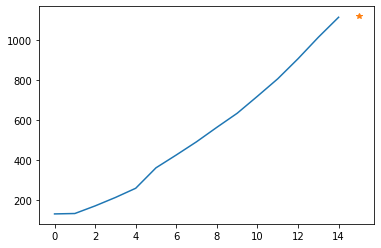

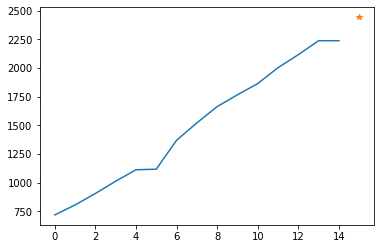

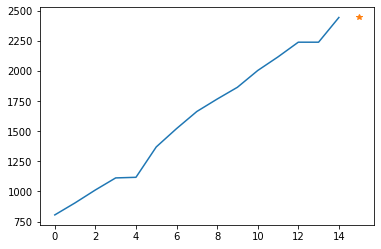

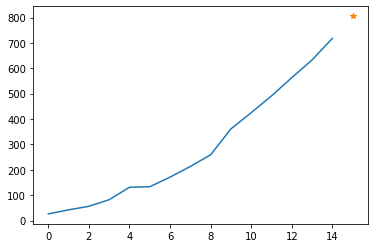

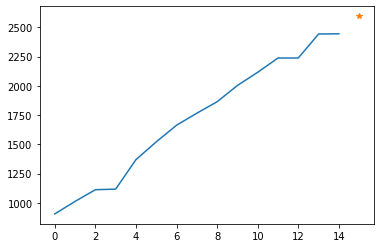

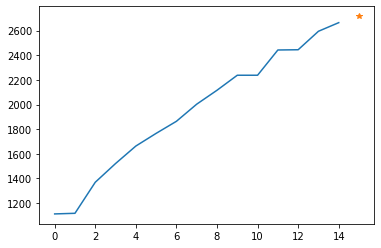

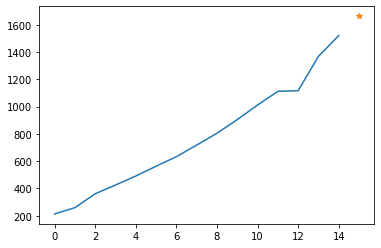

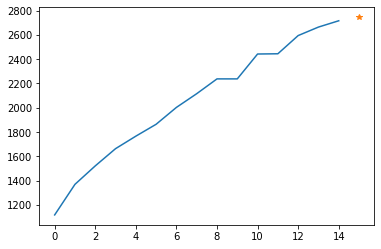

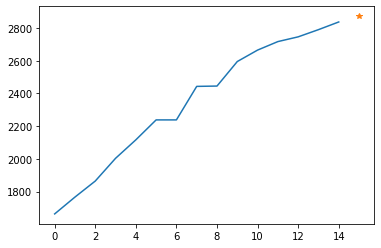

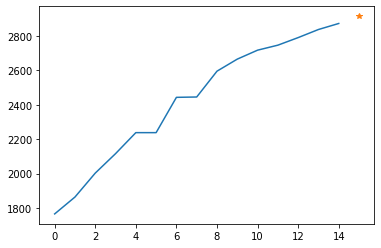

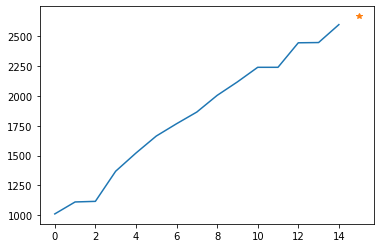

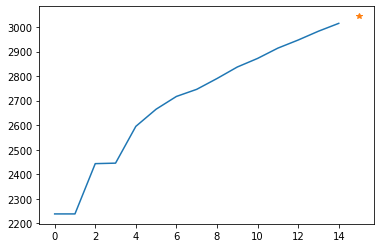

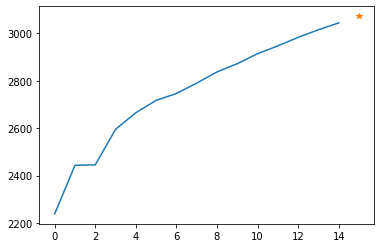

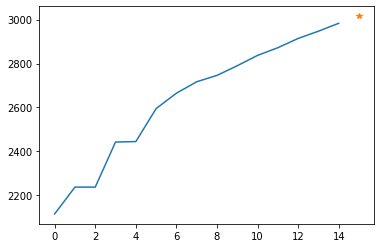

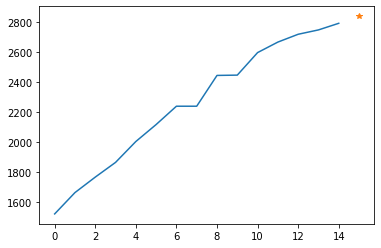

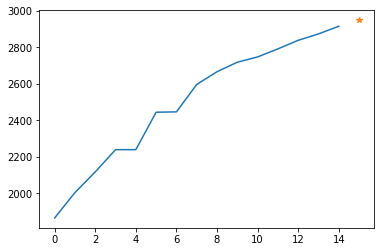

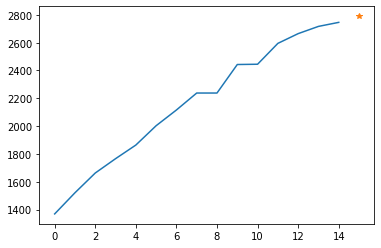

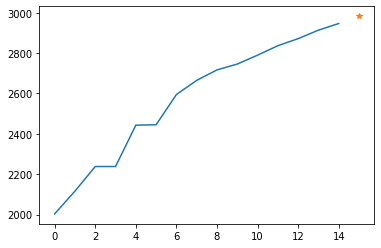

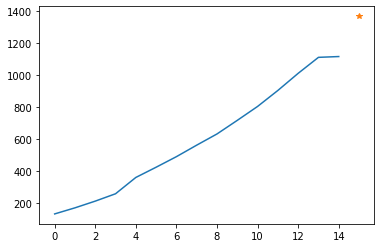

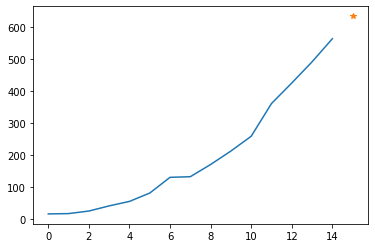

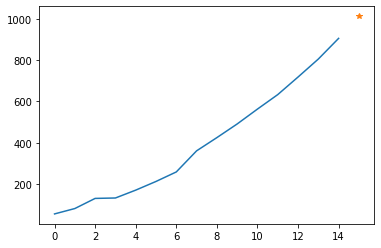

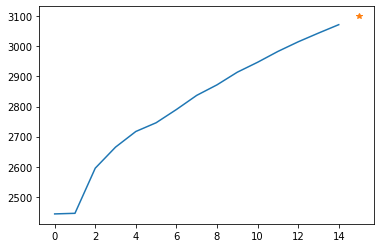

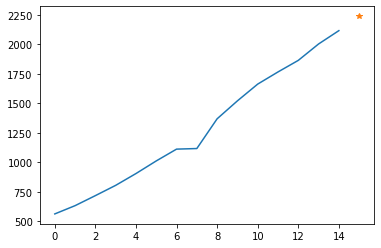

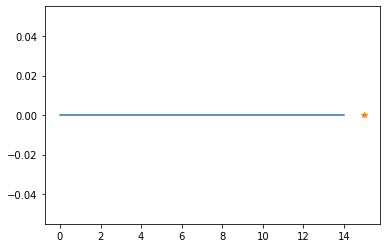

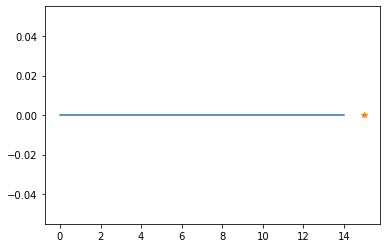

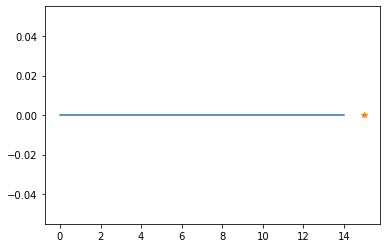

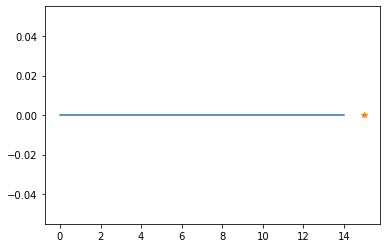

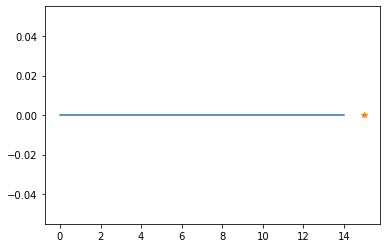

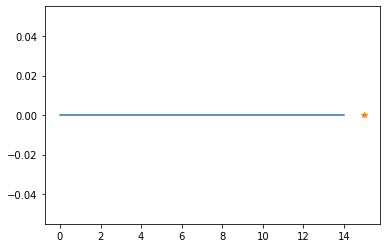

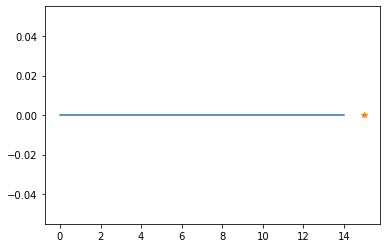

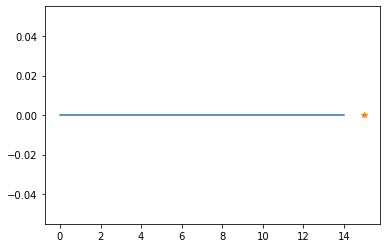

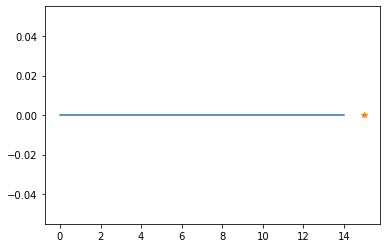

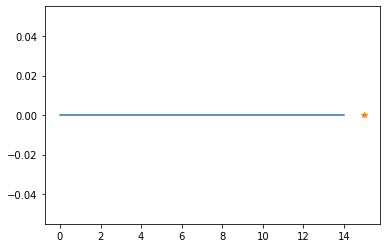

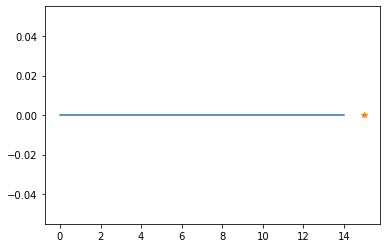

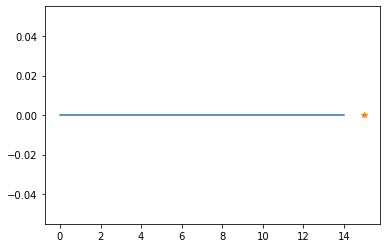

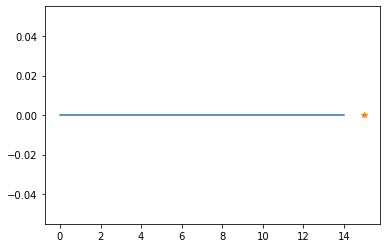

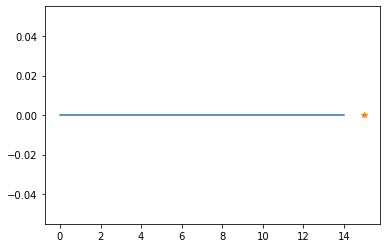

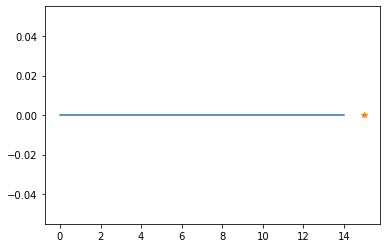

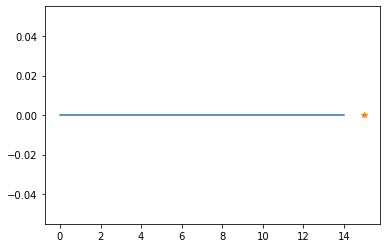

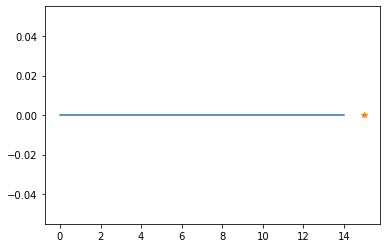

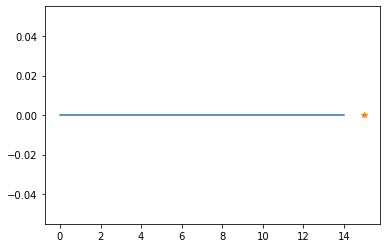

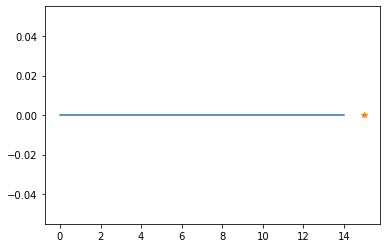

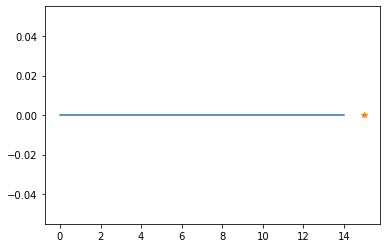

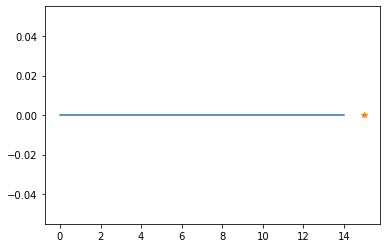

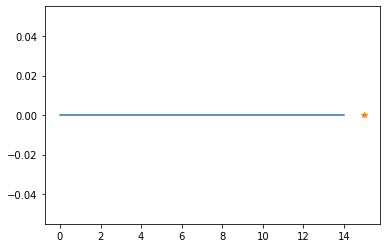

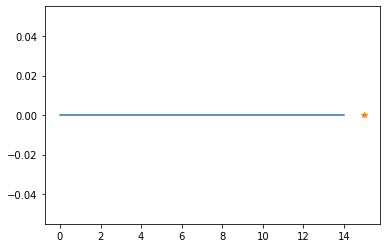

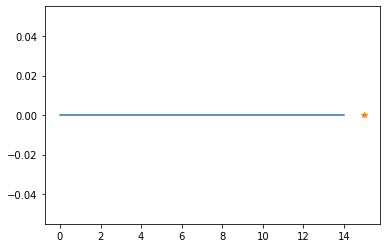

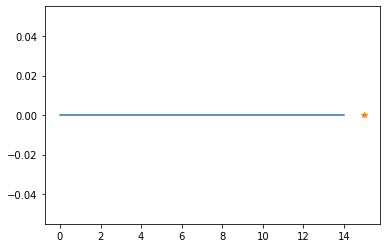

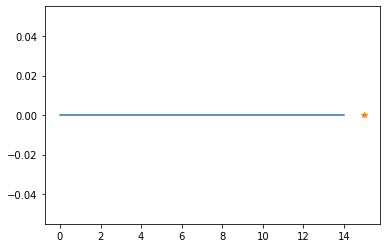

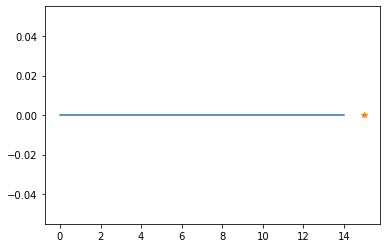

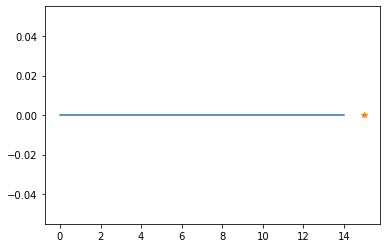

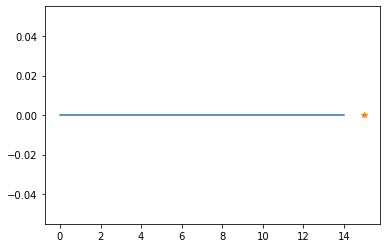

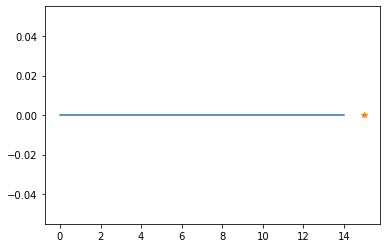

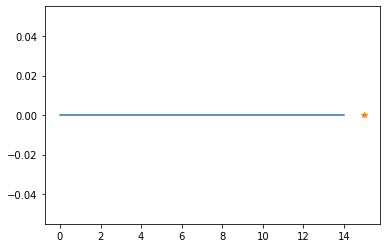

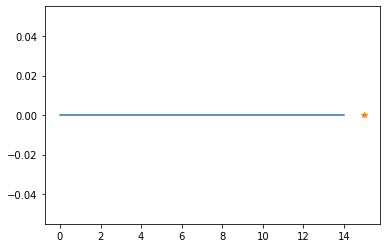

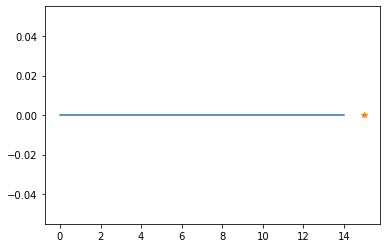

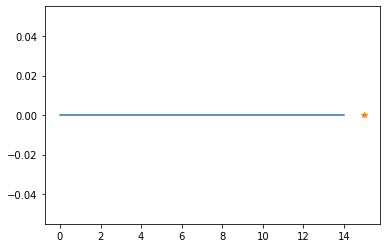

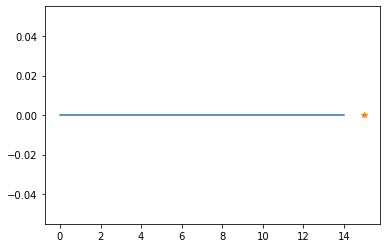

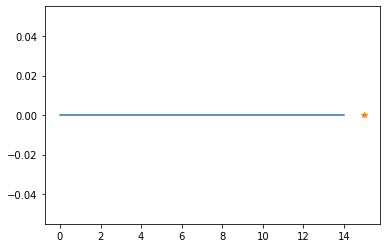

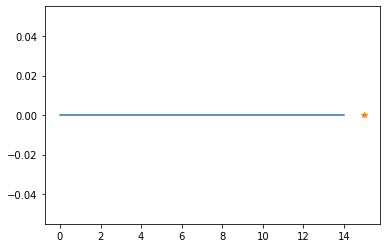

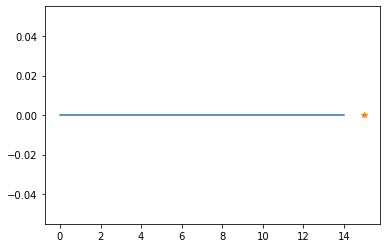

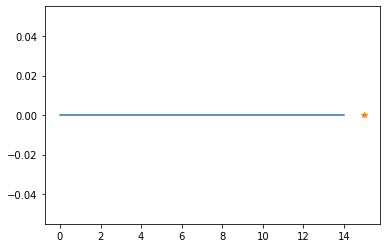

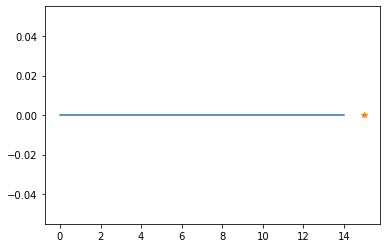

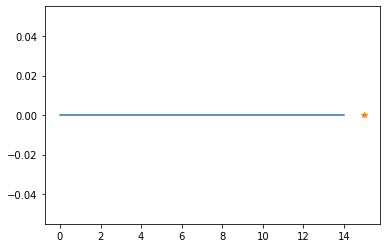

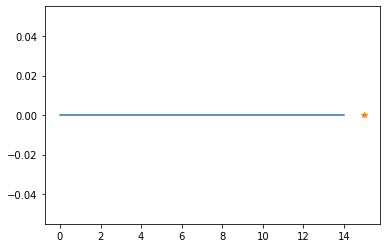

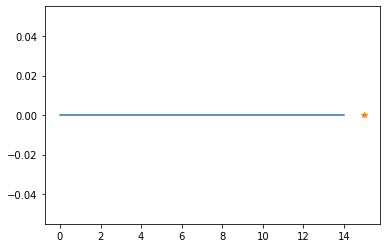

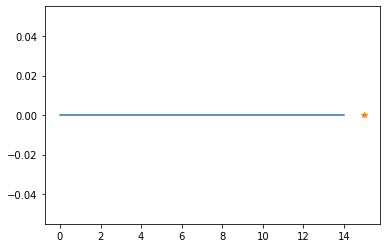

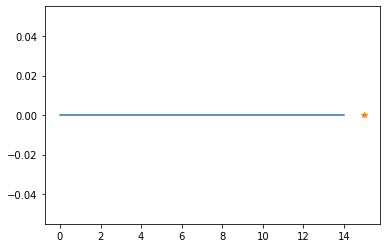

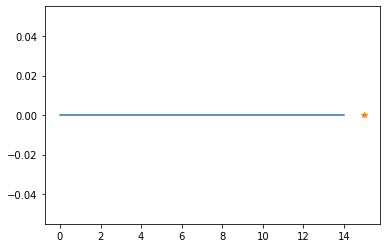

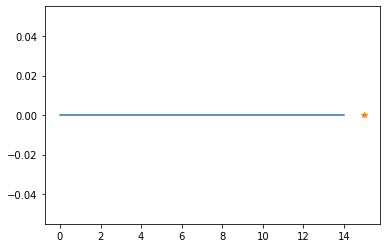

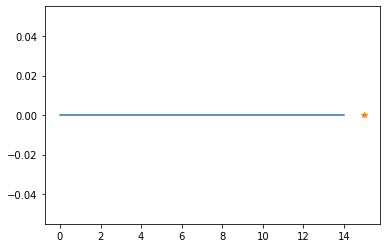

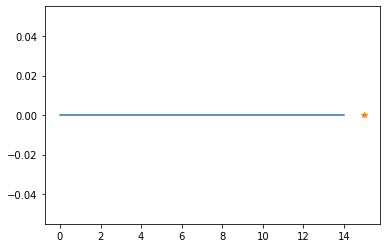

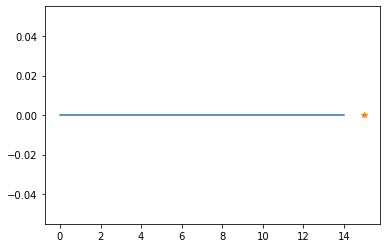

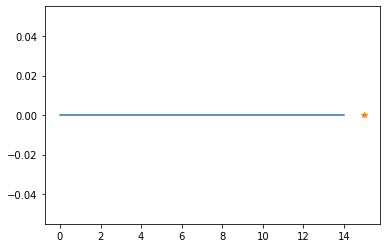

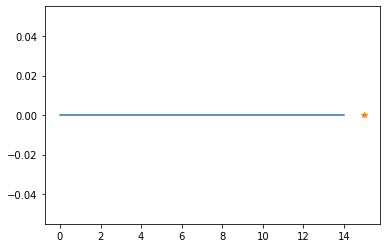

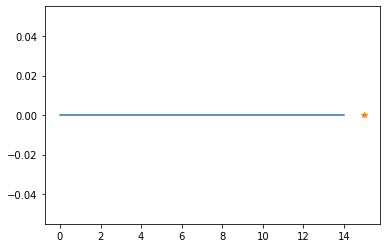

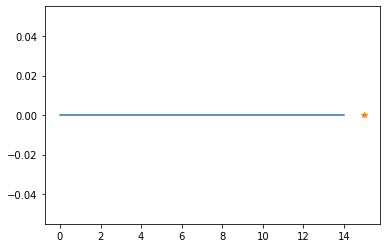

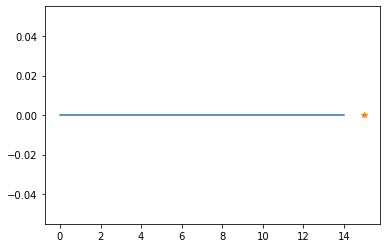

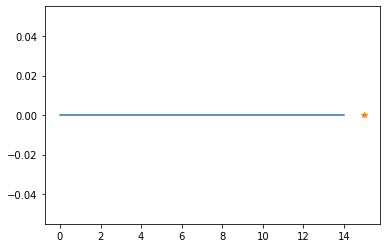

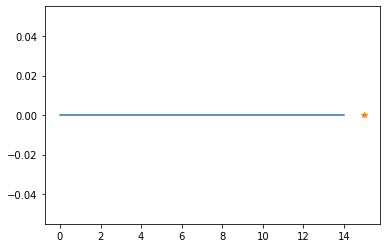

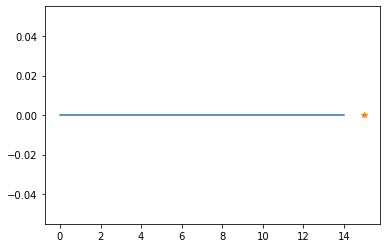

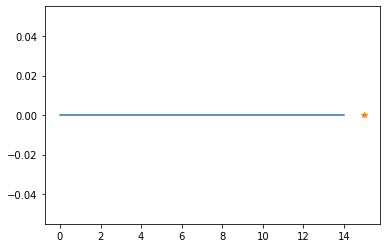

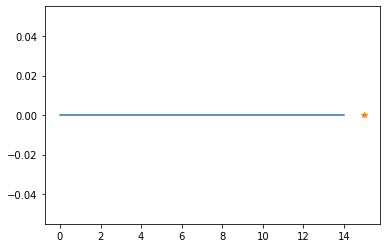

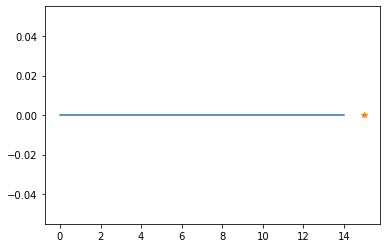

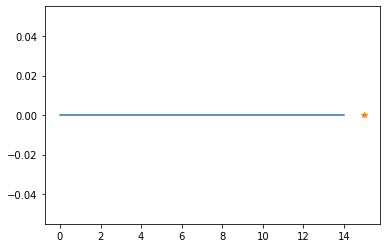

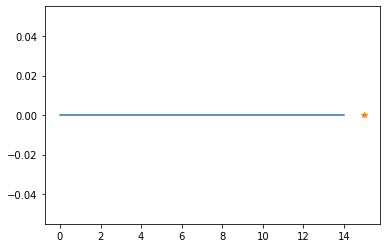

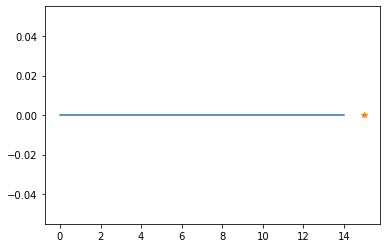

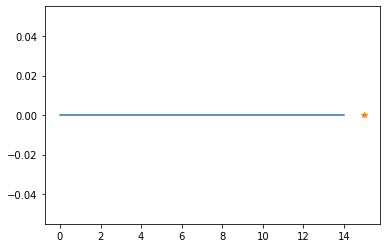

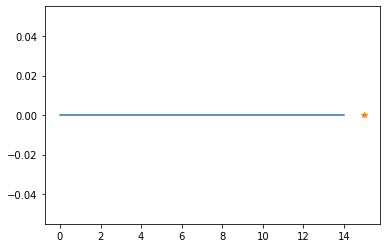

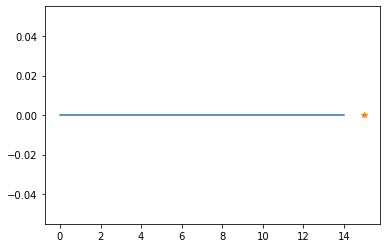

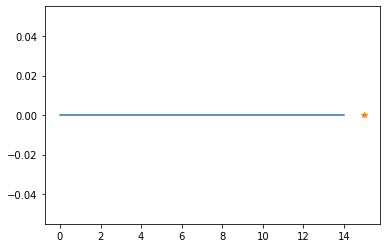

In [501]:
# visualise the prediction on each series
d=dataset_train.take(1)
for k,j in d:
    print(j.shape,k.shape)
    for m in range(100):
        plt.plot(k[m])
        plt.plot(15,j[m],"*")
        plt.show()

In [394]:
window_size

5

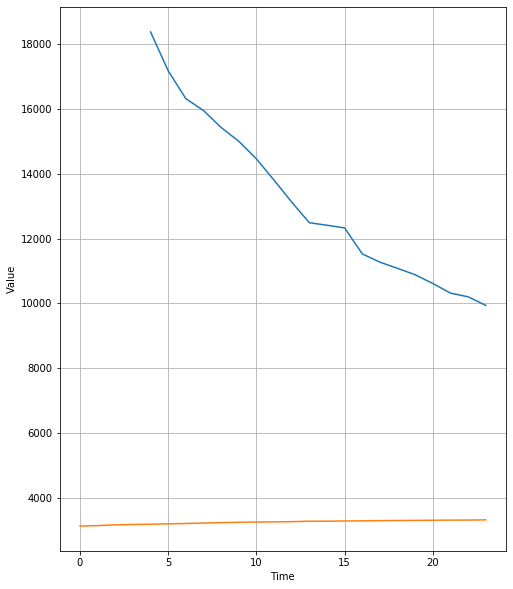

In [333]:
plt.figure(figsize=(8,10))
plot_series(range(4,len(series_validation)),forecast)
plot_series(range(len(series_validation)),series_validation_rescale)


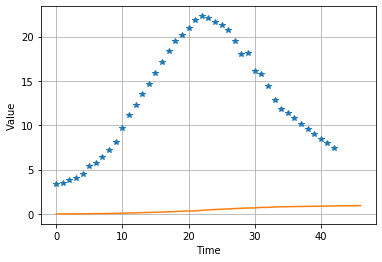

In [334]:
plot_series(range(len(forecast_train)),forecast_train,format='*')
plot_series(range(len(series_train)),series_train,format='-')

In [177]:
#lets visualize a long term prediction
#let considere china
def forecast_forward(step_forward,country,train):
    """
    forecast for a specific country a setp_forward time prediction 
    -step_forward: number of succesive prediction that have to be done
    - country : name of the country in the train dataset
    """

    country_series=train.loc[train.Territory==country,"target"].values
    predict=country_series
    for k in range(step_forward):

        predict=np.append(predict,model_forecast(model,predict,window_size)[-1])
    print(f'the predicted series has a size of {len(predict)}')
    
    return predict 

def visualize_forecast(country,step_forward=7,window_size=window_size):
    """
    it create graph of prediction and actual graph
    
    """
    china_series=train.loc[train.Territory==country,"target"].values
    to_predict=china_series[-step_forward:]
    past_series=china_series[:-step_forward]
    predict=past_series
    for k in range(step_forward):
    #     print(k,predict)
#         print(len(model_forecast(model,predict,window_size)))
        predict=np.append(predict,model_forecast(model,predict,window_size)[-1])

    plt.plot(range(len(predict)),predict,'*')
    plt.plot(china_series,'o')
    plt.plot(past_series)



In [181]:
train.Territory.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas (the)', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic (the)', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros (the)', 'Congo (the)', 'Costa Rica',
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', "Côte d'Ivoire",
       "Democratic People's Republic of Korea (the)",
       'Democratic Republic of the Congo (the)', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic (the)', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
 

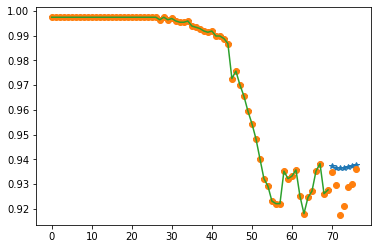

In [187]:
visualize_forecast( 'Iran (Islamic Republic of)')

In [487]:
forecast_forward(6,'China',train)

the predicted series has a size of 77


array([  17.        ,   18.        ,   26.        ,   42.        ,
         56.        ,   82.        ,  131.        ,  133.        ,
        171.        ,  213.        ,  259.        ,  361.        ,
        425.        ,  491.        ,  563.        ,  633.        ,
        718.        ,  805.        ,  905.        , 1012.        ,
       1112.        , 1117.        , 1369.        , 1521.        ,
       1663.        , 1766.        , 1864.        , 2003.        ,
       2116.        , 2238.        , 2238.        , 2443.        ,
       2445.        , 2595.        , 2665.        , 2717.        ,
       2746.        , 2790.        , 2837.        , 2872.        ,
       2914.        , 2947.        , 2983.        , 3015.        ,
       3044.        , 3072.        , 3100.        , 3123.        ,
       3139.        , 3161.        , 3172.        , 3180.        ,
       3193.        , 3203.        , 3217.        , 3230.        ,
       3241.        , 3249.        , 3253.        , 3259.     

In [429]:
train.tail()

,Territory X Date,target,cases,Territory,Date
14834,Zimbabwe X 3/28/20,1,7,Zimbabwe,3/28/20
14835,Zimbabwe X 3/29/20,1,7,Zimbabwe,3/29/20
14836,Zimbabwe X 3/30/20,1,7,Zimbabwe,3/30/20
14837,Zimbabwe X 3/31/20,1,8,Zimbabwe,3/31/20
14838,Zimbabwe X 4/1/20,1,8,Zimbabwe,4/1/20


In [462]:
# -find the step_forward for each country is it the same
d=set()
for k in train.Territory.unique():
    d.add(train.loc[train.Territory==k,'Date'].max())
    d.add(train.loc[train.Territory==k,'Date'].min())
#     print(train.loc[train.Territory==k,'Date'].max())
#     print(train.loc[train.Territory==k,'Date'].min())
print(d)


{'1/22/20', '4/1/20'}


In [451]:
import time
time.localtime()

time.struct_time(tm_year=2020, tm_mon=4, tm_mday=15, tm_hour=17, tm_min=20, tm_sec=33, tm_wday=2, tm_yday=106, tm_isdst=0)

In [469]:
(pd.to_datetime('2020-06-07')-pd.Timestamp.today()).days


train.loc[pd.to_datetime(train.Date)>=pd.to_datetime('2020-03-06')]

,Territory X Date,target,cases,Territory,Date
44,Afghanistan X 3/6/20,0,1,Afghanistan,3/6/20
45,Afghanistan X 3/7/20,0,1,Afghanistan,3/7/20
46,Afghanistan X 3/8/20,0,4,Afghanistan,3/8/20
47,Afghanistan X 3/9/20,0,4,Afghanistan,3/9/20
48,Afghanistan X 3/10/20,0,5,Afghanistan,3/10/20
...,...,...,...,...,...
14834,Zimbabwe X 3/28/20,1,7,Zimbabwe,3/28/20
14835,Zimbabwe X 3/29/20,1,7,Zimbabwe,3/29/20
14836,Zimbabwe X 3/30/20,1,7,Zimbabwe,3/30/20
14837,Zimbabwe X 3/31/20,1,8,Zimbabwe,3/31/20


In [470]:
# suppose that by magic i have some prediction how i submit ?
(pd.to_datetime('2020-06-07')-pd.Timestamp.today()).days

52

In [478]:
prediction

NameError: name 'prediction' is not defined

In [196]:
original_train.target.diff(-1),original_train.target

(0        0.0
 1        0.0
 2        0.0
 3        0.0
 4        0.0
         ... 
 16297    0.0
 16298    0.0
 16299   -1.0
 16300   -1.0
 16301    NaN
 Name: target, Length: 16302, dtype: float64, 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 16297    1
 16298    1
 16299    1
 16300    2
 16301    3
 Name: target, Length: 16302, dtype: int64)

In [192]:
country

'Zimbabwe'

In [191]:
original_train=pd.read_csv('train.csv')
new_train=train.loc[pd.to_datetime(train.Date)>=pd.to_datetime('2020-03-06')]
step_forward=(pd.to_datetime('2020-06-07')-pd.to_datetime(train.Date.max())).days
prediction=forecast_forward(step_forward,country,new_train)
prediction=scaler_all_data.inverse_transform(prediction.reshape(-1,1)).reshape(1,-1)[0]
prediction



the predicted series has a size of 94


array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.00000000e+00,
       -1.00000000e+00,  8.90660286e-03, -1.04286671e-02, -2.50480175e-02,
       -3.58946323e-02, -1.89173222e-02, -2.51659155e-02, -2.81133652e-02,
       -2.90565491e-02, -2.77596712e-02, -2.52838135e-02, -2.12752819e-02,
       -1.71488523e-02, -1.18434429e-02, -6.18433952e-03, -5.36441805e-05,
        6.07705116e-03,  1.27972364e-02,  1.97532177e-02,  2.70628929e-02,
        5.79521656e-02,  

In [42]:
import random

def submit(scaler):
    # dont forget to have more element than your input window lenght
    new_train=train.loc[pd.to_datetime(train.Date)>=pd.to_datetime('2020-03-06')]
    step_forward=(pd.to_datetime('2020-06-07')-pd.to_datetime(train.Date.max())).days
    dates = pd.date_range(start='2020-03-06', end='2020-06-07', freq='1d')
    ids = []
    prediction=np.array([])
    for country in sorted(train['Territory'].unique()):
        for d in dates:
            ids.append(country + ' X ' + d.strftime('%-m/%-d/%y'))
        prediction=np.append(prediction,forecast_forward(step_forward,country,new_train))
        
        
    print(len(prediction),len(ids))
    ss = pd.DataFrame({
        'Territory X Date':ids,
        'target':scaler.inverse_transform(prediction.reshape(-1,1)).reshape(1,-1)[0]
    })
    
#     for k in range(ss.shape[0]):
#         ss['target'].iloc[k]=random.randint(0,1000)
    ss.loc[ss.target<=0,'target']=0
    ss.to_csv('SampleSubmission_mine.csv', index=False)
    print(ss['target'].sum())
    ss.head()
submit(scaler_all_data)

the predicted series has a size of 94
the predicted series has a size of 94
the predicted series has a size of 94
the predicted series has a size of 94
the predicted series has a size of 94
the predicted series has a size of 94
the predicted series has a size of 94
the predicted series has a size of 94
the predicted series has a size of 94
the predicted series has a size of 94
the predicted series has a size of 94
the predicted series has a size of 94
the predicted series has a size of 94
the predicted series has a size of 94
the predicted series has a size of 94
the predicted series has a size of 94
the predicted series has a size of 94
the predicted series has a size of 94
the predicted series has a size of 94
the predicted series has a size of 94
the predicted series has a size of 94
the predicted series has a size of 94
the predicted series has a size of 94
the predicted series has a size of 94
the predicted series has a size of 94
the predicted series has a size of 94
the predicte

In [41]:
pd.read_csv('SampleSubmission_mine.csv')

,Territory X Date,target
0,Afghanistan X 03/06/20,0.0
1,Afghanistan X 03/07/20,0.0
2,Afghanistan X 03/08/20,0.0
3,Afghanistan X 03/09/20,0.0
4,Afghanistan X 03/10/20,0.0
...,...,...
19641,Zimbabwe X 06/03/20,0.0
19642,Zimbabwe X 06/04/20,0.0
19643,Zimbabwe X 06/05/20,0.0
19644,Zimbabwe X 06/06/20,0.0
